Chapter 8 Tree Based Methods - Question 11

In [58]:
library(ISLR)

In [59]:
caravan_dataset = Caravan
p = rep(0,nrow(caravan_dataset))
p[caravan_dataset$Purchase=="Yes"]=1
caravan_dataset$Purchase = p

# a

In [60]:
set.seed(1)
train = 1:1000

# b

In [61]:
library(gbm)
boost.model = gbm(Purchase~.,data=caravan_dataset[train,],shrinkage=0.01,n.trees=1000,distribution="bernoulli")

Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 50: PVRAAUT has no variation.”Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 71: AVRAAUT has no variation.”

,var,rel.inf
PPERSAUT,PPERSAUT,14.6350478
MKOOPKLA,MKOOPKLA,9.4709165
MOPLHOOG,MOPLHOOG,7.3145742
MBERMIDD,MBERMIDD,6.0865197
PBRAND,PBRAND,4.6676612
MGODGE,MGODGE,4.4946326
ABRAND,ABRAND,4.3242776
MINK3045,MINK3045,4.1759062
MOSTYPE,MOSTYPE,2.8640258
PWAPART,PWAPART,2.7819107


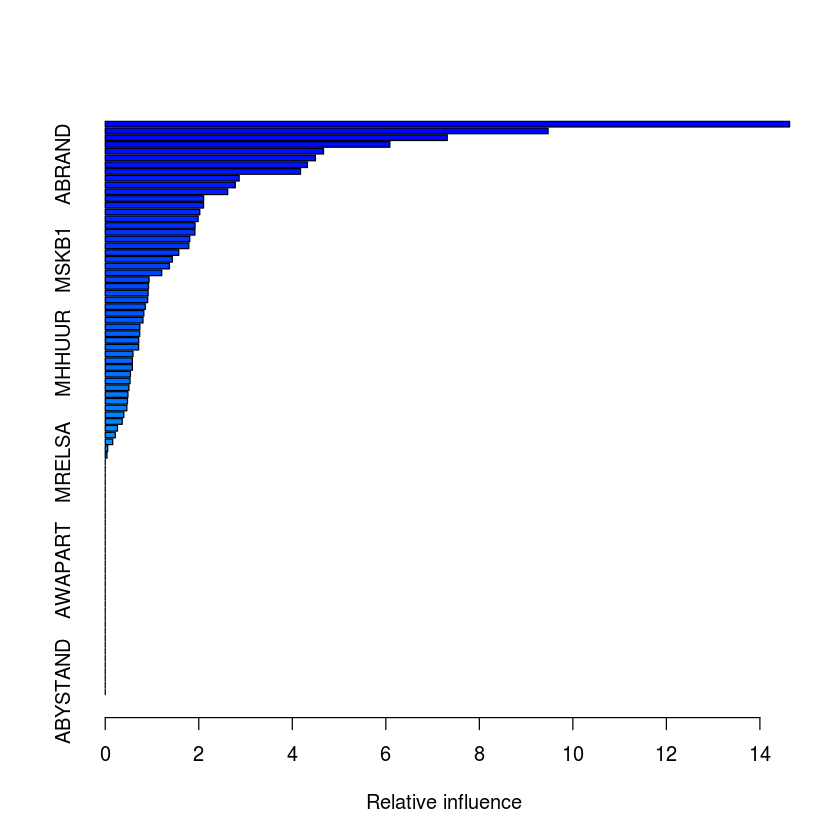

In [62]:
summary(boost.model)

The most important variables are PPERSAUT, MKOOPKLA and MBERMIDD.

# c

## Boosting

In [74]:
yhat = predict(boost.model,newdata=caravan_dataset[-train,],n.trees=1000,type="response")
purchase.pred = rep("No",length(yhat))
purchase.pred[yhat>0.2]="Yes"
table(purchase.pred,Caravan$Purchase[-train])

             
purchase.pred   No  Yes
          No  4410  256
          Yes  123   33

In [102]:
#Fraction of people predicted to make a purchase that do in fact make one. (Fraction of True Positives)
33/(123+33)

[1] 0.2115385

## knn

In [118]:
#knn
library(class)
std.x = scale(Caravan[,-86])
train.x = std.x[train,]
train.y = Caravan[train,86]
test.x = std.x[-train,]

In [119]:
set.seed(1)
knn.pred = knn(train.x,test.x,train.y,k=5)
table(knn.pred,Caravan$Purchase[-train])

        
knn.pred   No  Yes
     No  4506  279
     Yes   27   10

In [120]:
#Fraction of people predicted to make a purchase that do in fact make one. (Fraction of True Positives)
10/(27+10)

[1] 0.2702703

## Logistic Regression

In [125]:
#Logistic Regression
glm.model = glm(Purchase~.,data=Caravan,family=binomial,subset=train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [133]:
yhat = predict(glm.model,newdata=Caravan[-train,],type="response")
glm.pred = rep("No",length(yhat))
glm.pred[yhat>=0.5] = "Yes"
table(glm.pred,Caravan$Purchase[-train])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

        
glm.pred   No  Yes
     No  4446  274
     Yes   87   15

In [135]:
#Fraction of people predicted to make a purchase that do in fact make one. (Fraction of True Positives)
15/(15+87)

[1] 0.1470588

## Results

Boosting produces 21% True Positives.

KNN produces 27% True Positives.

Logistic Regression produces 14% True Positives.